# IDR Sequence Grammar By Condensate

This notebook calculates the sequence features of the human IDRome and then examines the features by condensate

* Part 1: Gathering all features of the full human IDRome
    * Gather data for the full human IDRome of sequences >=30
    
* Part 2: Analyze condensate specific IDR sequence features
    * Find significant / depleted features compared to full IDRome

# Part 1: Gathering all features of the full human IDRome

## Load in All Sapiens Disordered Stretches >=30

In [1]:
import pandas as pd

speciesname='sapiens'

# Gene names table
mapdf=pd.read_table('../Bioinformatics_Data/sapiens_uniprot_gene_name.tsv')
accsmap=mapdf['Uniprot'].tolist()
genesmap=mapdf['Gene'].tolist()

myseqs=[]
fullaccswnums=[]
goodidxs=[]
badidxs=[]
fullaccs=[]
mygenes=[]

myfile = open('../Bioinformatics_Data/min_length_30/All/'+speciesname, 'r')
Lines = myfile.readlines()

count=0
for line in Lines:
    count=count+1
    fullline=line.split(" ")
    tmpseq=fullline[3]
    tmpacc=fullline[0]
    currseq=tmpseq.strip('\n')
    
    if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
        myseqs.append(currseq)
        fullaccswnums.append(tmpacc)
        goodidxs.append(count)
        tmp=tmpacc.split("_")
        fullaccs.append(tmp[0])
        if tmp[0] in accsmap:
            currgidx=accsmap.index(tmp[0])
            mygenes.append(genesmap[currgidx]+' IDR'+tmp[1])
        else:
            mygenes.append(tmp[0]+' IDR'+tmp[1])
    else:
        badidxs.append(count)
        
print(len(myseqs))
print(count)
print(len(goodidxs))
print(badidxs)
#print(mygenes)

24508
24535
24508
[337, 338, 5387, 7965, 8270, 8860, 9309, 13434, 18343, 20894, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 21628, 22016, 23960]


## Load NARDINI data for all sapiens IDRs >= 30

In [2]:
import numpy as np
zvec=np.load('../Bioinformatics_Data/'+speciesname+'_full_idrome_gte_30_nardini.npy')
#print(zvec)


# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvec[idx])
print(zvec[idx][21])
print(len(zvec))

MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[10.59108354  0.          0.          0.          0.         11.65941098
  0.         14.39589484  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  5.76110201  0.          7.43819192  0.          0.          7.20103122]
0.0
24508


## List of patterning and compositional feature names

In [3]:
myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','K/R Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Block','C Block','D Block','E Block','F Block','G Block','H Block','I Block','K Block','L Block','M Block','N Block','P Block','Q Block','R Block','S Block','T Block','V Block','Y Block','RG Frac']

myfeatnardini=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']

print(len(myfeat))

90


## Get all compositional features for the sapiens IDRome

[0.07741329870246792, 0.008538805724799583, 0.05127727736370751, 0.09008763614629162, 0.014270327223274142, 0.08332631606660568, 0.023213564275380197, 0.01785675831127527, 0.06098073687889461, 0.05867819723550179, 0.016164841817388885, 0.030837123165538154, 0.11307352429649098, 0.05451395702245792, 0.06577801431451794, 0.12502566544640797, 0.05722109753347246, 0.03588171932609476, 0.005580771458323423, 0.010280367691109179, 0.12675875119341254, 0.14136491350999913, 0.38267652923466194, 0.20599481539272863, 0.030131466372706743, -0.05493351039784073, 0.1841411803139005, 0.3811971889999026, 0.26812366470341165, -0.01460616231658658, 3.4110708906101537, 0.8019110880466948, 7.44443247900792, 0.4044778171527079, 0.013228570102474755, 2.8313019279589203e-06, 0.00565433376114803, 0.024103760059206916, 1.1039838114785175e-05, 0.023394616782112673, 0.0014528601714245697, 1.625241407649792e-05, 0.012782162346973061, 0.0011648168919885275, 9.498442431682362e-05, 0.0008614367526042599, 0.040365351

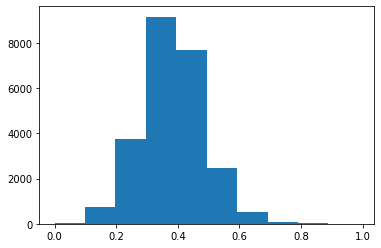

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

aas='ACDEFGHIKLMNPQRSTVY' # For blocks - no W Block in proteome so this is removed

filename=[speciesname]

for fname in filename:
    myfile = open('../Bioinformatics_Data/min_length_30/All/'+fname, 'r')
    Lines = myfile.readlines()
    fracA=[]
    fracC=[]
    fracD=[]
    fracE=[]
    fracF=[]
    fracG=[]
    fracH=[]
    fracI=[]
    fracK=[]
    fracL=[]
    fracM=[]
    fracN=[]
    fracP=[]
    fracQ=[]
    fracR=[]
    fracS=[]
    fracT=[]
    fracV=[]
    fracW=[]
    fracY=[]
    fracpos=[]
    fracneg=[]
    fracpol=[]
    fracali=[]
    fracaro=[]
    fracKtoR=[]
    fracEtoD=[]
    fracexp=[]
    fcr=[]
    ncpr=[]
    mhydro=[]
    dispro=[]
    isopoi=[]
    ppii=[]
    fracpatch=[[] for _ in range(len(aas))]
    rgpatch=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()
            aafrac=SeqOb.get_amino_acid_fractions()
            
            fracexp.append(SeqOb.get_fraction_expanding())
            fcr.append(SeqOb.get_FCR())
            ncpr.append(SeqOb.get_NCPR())
            mhydro.append(SeqOb.get_mean_hydropathy())
            dispro.append(SeqOb.get_fraction_disorder_promoting())
            isopoi.append(SeqOb.get_isoelectric_point())
            ppii.append(SeqOb.get_PPII_propensity(mode='hilser'))

            ## AA Fractions
            fracA.append(aafrac['A'])
            fracC.append(aafrac['C'])
            fracD.append(aafrac['D'])
            fracE.append(aafrac['E'])
            fracF.append(aafrac['F'])
            fracG.append(aafrac['G'])
            fracH.append(aafrac['H'])
            fracI.append(aafrac['I'])
            fracK.append(aafrac['K'])
            fracL.append(aafrac['L'])
            fracM.append(aafrac['M'])
            fracN.append(aafrac['N'])
            fracP.append(aafrac['P'])
            fracQ.append(aafrac['Q'])
            fracR.append(aafrac['R'])
            fracS.append(aafrac['S'])
            fracT.append(aafrac['T'])
            fracV.append(aafrac['V'])
            fracW.append(aafrac['W'])
            fracY.append(aafrac['Y'])

            ## AA Physicochemical properties
            fracpos.append(aafrac['K']+aafrac['R'])
            fracneg.append(aafrac['D']+aafrac['E'])
            fracpol.append(aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])
            fracali.append(aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])
            fracaro.append(aafrac['F']+aafrac['W']+aafrac['Y'])
            
            ## AA ratios
            fracKtoR.append(np.log10(((slen*aafrac['K'])+1)/((slen*aafrac['R'])+1)))
            fracEtoD.append(np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1)))
            
            ## Fraction of sequence containing blocks
            counta=-1
            for a in aas:
                counta=counta+1
                justKs='0'*len(currseq) # Set string of zeros

                pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

                # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
                pos2=pos
                for p in range(0,len(pos)-1):
                    tdi=pos[p+1]-pos[p]
                    if tdi > 1 and tdi<=numInt+1:
                        myt=list(range(pos[p]+1,pos[p+1]))
                        for item in myt:
                            pos2.append(item)


                # For positions make those 1 in string of zeros   
                justKs = list(justKs)
                for p in pos2:
                    justKs[p]='1'
                justKs = ''.join(justKs)


                the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
                idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

                numpatches=0
                count=-1
                patchescombined=''
                for o in the_ones:
                    count=count+1
                    myrange=idx_ones[count] # Get indices for each consecutive strength
                    subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                    pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
                    # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
                    if len(pos3)>=minBlockLen:
                        numpatches=numpatches+1
                        patchescombined+=subseq

                fracpatch[counta].append(len(patchescombined)/len(currseq))
                
            ## Fraction of sequence in RG stretch
            justKs='0'*len(currseq) # Set string of zeros
            pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

            # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
            pos2=pos
            for p in range(0,len(pos)-1):
                tdi=pos[p+1]-pos[p]
                if tdi > 1 and tdi<=numInt+1:
                    myt=list(range(pos[p]+1,pos[p+1]))
                    for item in myt:
                        pos2.append(item)

            # For positions make those 1 in string of zeros             
            justKs = list(justKs)
            for p in pos2:
                justKs[p]='1'
            justKs = ''.join(justKs)

            the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
            idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

            count=-1
            patchescombined=''
            for o in the_ones:
                count=count+1
                myrange=idx_ones[count] # Get indices for each consecutive strength
                subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                pos3=subseq.count('RG')
                #print(subseq)
                if pos3>=2:
                    patchescombined+=subseq

            rgpatch.append(len(patchescombined)/len(currseq))

    meanvals_sapiens=[np.mean(fracA), np.mean(fracC), np.mean(fracD), np.mean(fracE), np.mean(fracF), np.mean(fracG), np.mean(fracH), np.mean(fracI), np.mean(fracK), np.mean(fracL), np.mean(fracM), np.mean(fracN), np.mean(fracP), np.mean(fracQ), np.mean(fracR), np.mean(fracS), np.mean(fracT), np.mean(fracV), np.mean(fracW), np.mean(fracY), np.mean(fracpos), np.mean(fracneg), np.mean(fracpol), np.mean(fracali), np.mean(fracaro), np.mean(fracKtoR), np.mean(fracEtoD), np.mean(fracexp), np.mean(fcr), np.mean(ncpr), np.mean(mhydro), np.mean(dispro), np.mean(isopoi), np.mean(ppii)]
    stdvals_sapiens=[np.std(fracA), np.std(fracC), np.std(fracD), np.std(fracE), np.std(fracF), np.std(fracG), np.std(fracH), np.std(fracI), np.std(fracK), np.std(fracL), np.std(fracM), np.std(fracN), np.std(fracP), np.std(fracQ), np.std(fracR), np.std(fracS), np.std(fracT), np.std(fracV), np.std(fracW), np.std(fracY), np.std(fracpos), np.std(fracneg), np.std(fracpol), np.std(fracali), np.std(fracaro), np.std(fracKtoR), np.std(fracEtoD), np.std(fracexp), np.std(fcr), np.std(ncpr), np.std(mhydro), np.std(dispro), np.std(isopoi), np.std(ppii)]
    
    for a in fracpatch:
        meanvals_sapiens.append(np.mean(a))
        stdvals_sapiens.append(np.std(a))
    
    meanvals_sapiens.append(np.mean(rgpatch))
    stdvals_sapiens.append(np.std(rgpatch))
    

    print(meanvals_sapiens)
    print(stdvals_sapiens)
    print(len(rgpatch))
    print(len(fracA))
    print(np.mean(rgpatch))
    print(np.std(rgpatch))
    
    
    plt.hist(fracpol)

## Add compositional data to z-score feature vector

In [5]:
typeall=['pol','hyd','pos','neg','aro','ala','pro','gly']
zvecaa=np.zeros((len(myseqs),int(len(typeall)+(len(typeall)*(len(typeall)-1))/2)+34+len(aas)+1))
tmp=zvec

countseq=-1
for currseq in myseqs:
    countseq=countseq+1
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    aafrac=SeqOb.get_amino_acid_fractions()
    
    fracexp=SeqOb.get_fraction_expanding()
    fcr=SeqOb.get_FCR()
    ncpr=SeqOb.get_NCPR()
    mhydro=SeqOb.get_mean_hydropathy()
    dispro=SeqOb.get_fraction_disorder_promoting()
    isopoi=SeqOb.get_isoelectric_point()
    ppii=SeqOb.get_PPII_propensity(mode='hilser')
    
    tmpseq=[]
    
    ## AA Fractions
    afA=np.array((aafrac['A']-meanvals_sapiens[0])/stdvals_sapiens[0])
    tmpseq.append(afA)
    afC=np.array((aafrac['C']-meanvals_sapiens[1])/stdvals_sapiens[1])
    tmpseq.append(afC)
    afD=np.array((aafrac['D']-meanvals_sapiens[2])/stdvals_sapiens[2])
    tmpseq.append(afD)
    afE=np.array((aafrac['E']-meanvals_sapiens[3])/stdvals_sapiens[3])
    tmpseq.append(afE)
    afF=np.array((aafrac['F']-meanvals_sapiens[4])/stdvals_sapiens[4])
    tmpseq.append(afF)
    afG=np.array((aafrac['G']-meanvals_sapiens[5])/stdvals_sapiens[5])
    tmpseq.append(afG)
    afH=np.array((aafrac['H']-meanvals_sapiens[6])/stdvals_sapiens[6])
    tmpseq.append(afH)
    afI=np.array((aafrac['I']-meanvals_sapiens[7])/stdvals_sapiens[7])
    tmpseq.append(afI)
    afK=np.array((aafrac['K']-meanvals_sapiens[8])/stdvals_sapiens[8])
    tmpseq.append(afK)
    afL=np.array((aafrac['L']-meanvals_sapiens[9])/stdvals_sapiens[9])
    tmpseq.append(afL)
    afM=np.array((aafrac['M']-meanvals_sapiens[10])/stdvals_sapiens[10])
    tmpseq.append(afM)
    afN=np.array((aafrac['N']-meanvals_sapiens[11])/stdvals_sapiens[11])
    tmpseq.append(afN)
    afP=np.array((aafrac['P']-meanvals_sapiens[12])/stdvals_sapiens[12])
    tmpseq.append(afP)
    afQ=np.array((aafrac['Q']-meanvals_sapiens[13])/stdvals_sapiens[13])
    tmpseq.append(afQ)
    afR=np.array((aafrac['R']-meanvals_sapiens[14])/stdvals_sapiens[14])
    tmpseq.append(afR)
    afS=np.array((aafrac['S']-meanvals_sapiens[15])/stdvals_sapiens[15])
    tmpseq.append(afS)
    afT=np.array((aafrac['T']-meanvals_sapiens[16])/stdvals_sapiens[16])
    tmpseq.append(afT)
    afV=np.array((aafrac['V']-meanvals_sapiens[17])/stdvals_sapiens[17])
    tmpseq.append(afV)
    afW=np.array((aafrac['W']-meanvals_sapiens[18])/stdvals_sapiens[18])
    tmpseq.append(afW)
    afY=np.array((aafrac['Y']-meanvals_sapiens[19])/stdvals_sapiens[19])
    tmpseq.append(afY)
    
    ## AA Physicochemical properties
    afpos=np.array(((aafrac['K']+aafrac['R'])-meanvals_sapiens[20])/stdvals_sapiens[20])
    tmpseq.append(afpos)
    afneg=np.array(((aafrac['D']+aafrac['E'])-meanvals_sapiens[21])/stdvals_sapiens[21])
    tmpseq.append(afneg)
    afpol=np.array(((aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])-meanvals_sapiens[22])/stdvals_sapiens[22])
    tmpseq.append(afpol)
    afali=np.array(((aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])-meanvals_sapiens[23])/stdvals_sapiens[23])
    tmpseq.append(afali)
    afaro=np.array(((aafrac['F']+aafrac['W']+aafrac['Y'])-meanvals_sapiens[24])/stdvals_sapiens[24])
    tmpseq.append(afaro)
    
    ## AA ratios
    afRK=np.array((np.log10(((slen*aafrac['K'])+1)/((slen*aafrac['R'])+1))-meanvals_sapiens[25])/stdvals_sapiens[25])
    tmpseq.append(afRK)
    afED=np.array((np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1))-meanvals_sapiens[26])/stdvals_sapiens[26])
    tmpseq.append(afED)
    
    ## Charge measures
    afexp=np.array((fracexp-meanvals_sapiens[27])/stdvals_sapiens[27])
    tmpseq.append(afexp)
    afcr=np.array((fcr-meanvals_sapiens[28])/stdvals_sapiens[28])
    tmpseq.append(afcr)
    ancpr=np.array((ncpr-meanvals_sapiens[29])/stdvals_sapiens[29])
    tmpseq.append(ancpr)
    
    ## Miscellaneous measures
    amhydro=np.array((mhydro-meanvals_sapiens[30])/stdvals_sapiens[30])
    tmpseq.append(amhydro)
    adispro=np.array((dispro-meanvals_sapiens[31])/stdvals_sapiens[31])
    tmpseq.append(adispro)
    aisopoi=np.array((isopoi-meanvals_sapiens[32])/stdvals_sapiens[32])
    tmpseq.append(aisopoi)
    appii=np.array((ppii-meanvals_sapiens[33])/stdvals_sapiens[33])
    tmpseq.append(appii)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in aas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq

        afracpatch=(len(patchescombined)/len(currseq))
        afracp=np.array((afracpatch-meanvals_sapiens[33+counta+1])/stdvals_sapiens[33+counta+1])
        tmpseq.append(afracp)
    
    ## Fraction of sequence in RG stretch
    justKs='0'*len(currseq) # Set string of zeros
    pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=pos
    for p in range(0,len(pos)-1):
        tdi=pos[p+1]-pos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(pos[p]+1,pos[p+1]))
            for item in myt:
                pos2.append(item)

    # For positions make those 1 in string of zeros             
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    count=-1
    patchescombined=''
    for o in the_ones:
        count=count+1
        myrange=idx_ones[count] # Get indices for each consecutive strength
        subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
        pos3=subseq.count('RG')
        if pos3>=2:
            patchescombined+=subseq

    arg=(len(patchescombined)/len(currseq))
    argp=np.array((arg-meanvals_sapiens[33+counta+2])/stdvals_sapiens[33+counta+2])
    tmpseq.append(argp)
    
    zvecaa[countseq,:]=np.append(tmp[countseq,:],tmpseq)
    #print(np.append(zvecaa[countseq,:],afA))
    #print((zvecaa))
    
    
print(np.shape(zvecaa))

# check vector
idx=fullaccswnums.index('P19338_1')
print(myseqs[idx])
print(zvecaa[idx])


(24508, 90)
MVKLAKAGKNQGDPKKMAPPPKEVEEDSEDEEMSEDEEDDSSGEEVVIPQKKGKKAAATSAKKVVVSPTKKVAVATPAKKAAVTPGKKAAATPAKKTVTPAKAVTTPGKKGATPGKALVATPGKKGAAIPAKGAKNGKNAKKEDSDEEEDDDSEEDEEDDEDEDEDEDEIEPAAMKAAAAAPASEDEDDEDDEDDEDDDDDEEDDSEEEAMETTPAKGKKAAKVVPVKAKNVAEDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEEPVKEAPGKRKKEMAKQKAAPEAKKQKVEGTEPT
[ 3.13247545e-01  0.00000000e+00  1.57138428e-01  1.51552782e+01
  0.00000000e+00  8.72471807e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.70047579e+00
  1.89259757e+01  0.00000000e+00 -8.19460993e-01  0.00000000e+00
  0.00000000e+00  2.38070652e+01  0.00000000e+00  1.92995655e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.81576292e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.29562459e+00 -5.82363193e-01  2.72504368e+00  1.66147540e+00
 -8.07098573e-01 -5.49553465e-01 

# Part 2: Analyze condensate specific IDR sequence features

## Load in condensate specific accessions extracted from the HPA or Papers

In [6]:
tmpdf=pd.read_table('../Bioinformatics_Data/HPA_All/2023_03/subcell_location_Nuclear_speckles.tsv')
#tmpdf=pd.read_table('../Bioinformatics_Data/HPA_All/2023_03/subcell_location_Nuclear_bodies.tsv')
#tmpdf=pd.read_table('../Bioinformatics_Data/From_Papers/Hubstenberger_pbody.txt')
#tmpdf=pd.read_table('../Bioinformatics_Data/From_Papers/Jain_stress_granule.txt')
print(tmpdf)

accs_nuc=tmpdf['Uniprot'].tolist()

# Find indices of IDRs that correspond to all nucleolar proteins
allidx_nuc=[]
for ns in accs_nuc:
    indices = [i for i, x in enumerate(fullaccs) if x == ns]
    for i in indices:
        allidx_nuc.append(i)
allidx_nuc = list(set(allidx_nuc)) # all unique indices
print(len(allidx_nuc))


# Get the corresponding gene names and nucleolar accswnums
genenames_nuc=[]
genenameswnums_nuc=[]
seqs_nuc=[]
for i in allidx_nuc:

    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames_nuc.append(tmp[0])
    
    # Get gene names with IDR number
    genenameswnums_nuc.append(mygenes[i])
    
    # Get sequences
    seqs_nuc.append(myseqs[i])
    
#print(genenames_nuc)
#print(genenameswnums_nuc)
print(len(genenameswnums_nuc))
#print(genenameswnums_nuc)

           Gene          Ensembl Uniprot
0         AAGAB  ENSG00000103591  Q6PD74
1       ABHD17A  ENSG00000129968  Q96GS6
2    AC023055.1  ENSG00000257390     NaN
3    AC091959.1  ENSG00000275740     NaN
4          ADAL  ENSG00000168803  Q6DHV7
..          ...              ...     ...
485      ZNHIT6  ENSG00000117174  Q9NWK9
486     ZSCAN5A  ENSG00000131848  Q9BUG6
487     ZSCAN5B  ENSG00000197213  A6NJL1
488     ZSCAN5C  ENSG00000204532  A6NGD5
489      ZSWIM5  ENSG00000162415  Q9P217

[490 rows x 3 columns]
911
911


## Compare z-score distributions between nucleolar IDRs and rest of IDRome

911
911
24508
Ks_2sampResult(statistic=0.0573461704907976, pvalue=0.006245293074403723)
pol-pol
2.204447176567698


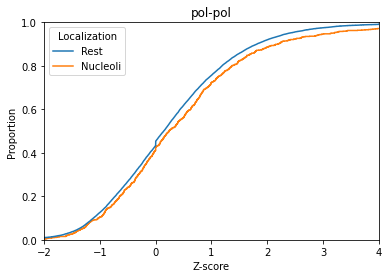

Ks_2sampResult(statistic=0.027158469185300294, pvalue=0.5370997802329164)
pol-hyd
0.0
Ks_2sampResult(statistic=0.05233748713242725, pvalue=0.016372023796492764)
pol-pos
1.7858976327857476


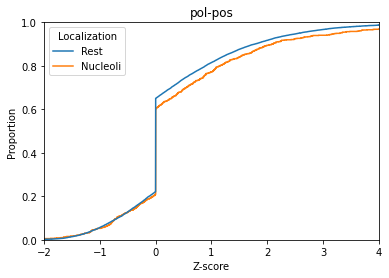

Ks_2sampResult(statistic=0.061092483848925516, pvalue=0.002867505194155031)
pol-neg
2.542495786751603


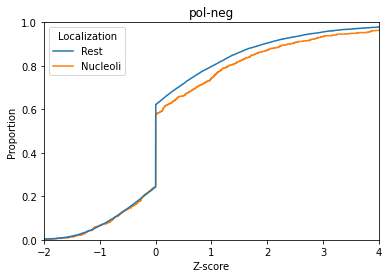

Ks_2sampResult(statistic=0.00642591313422556, pvalue=0.9999999999999788)
pol-aro
0.0
Ks_2sampResult(statistic=0.05075623345485647, pvalue=0.021792159164657605)
pol-ala
-1.661699737773913


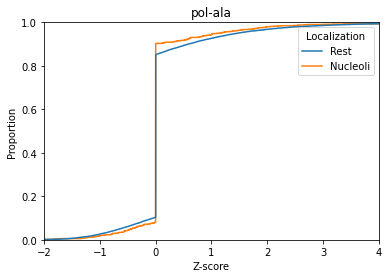

Ks_2sampResult(statistic=0.035272070111425996, pvalue=0.2251896748695958)
pol-pro
0.0
Ks_2sampResult(statistic=0.028896117745902228, pvalue=0.45654816143483495)
pol-gly
0.0
Ks_2sampResult(statistic=0.0392484169902525, pvalue=0.13405512426408714)
hyd-hyd
0.0
Ks_2sampResult(statistic=0.0488629343057293, pvalue=0.030338562690124627)
hyd-pos
1.5180049980560038


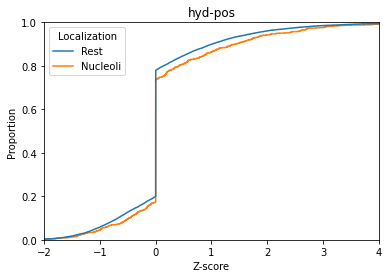

Ks_2sampResult(statistic=0.028988735893467732, pvalue=0.45243148090545937)
hyd-neg
0.0
Ks_2sampResult(statistic=0.006370137564697218, pvalue=0.9999999999999882)
hyd-aro
0.0
Ks_2sampResult(statistic=0.019891224149081843, pvalue=0.8783675138733996)
hyd-ala
0.0
Ks_2sampResult(statistic=0.016797889664572963, pvalue=0.965525034990792)
hyd-pro
0.0
Ks_2sampResult(statistic=0.008347774585012784, pvalue=0.9999999826095444)
hyd-gly
0.0
Ks_2sampResult(statistic=0.06437314795686278, pvalue=0.0013928678743194349)
pos-pos
2.856090078246149


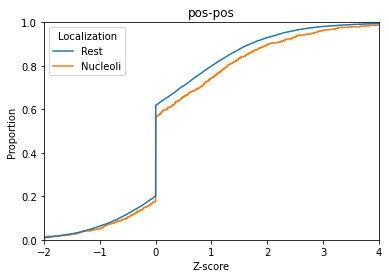

Ks_2sampResult(statistic=0.035522060028561286, pvalue=0.21833354083043122)
pos-neg
0.0
Ks_2sampResult(statistic=0.003704446792176741, pvalue=1.0)
pos-aro
0.0
Ks_2sampResult(statistic=0.026828839756044442, pvalue=0.5529918314832178)
pos-ala
0.0
Ks_2sampResult(statistic=0.02917620507211586, pvalue=0.4441594997423494)
pos-pro
0.0
Ks_2sampResult(statistic=0.009984943387331802, pvalue=0.9999936702797458)
pos-gly
0.0
Ks_2sampResult(statistic=0.04023479328406321, pvalue=0.11684138760333282)
neg-neg
0.0
Ks_2sampResult(statistic=0.003234145701324742, pvalue=1.0)
neg-aro
0.0
Ks_2sampResult(statistic=0.024907210897290286, pvalue=0.647959012220116)
neg-ala
0.0
Ks_2sampResult(statistic=0.012862572020378549, pvalue=0.9986629482718006)
neg-pro
0.0
Ks_2sampResult(statistic=0.011109665422407877, pvalue=0.9999143413046667)
neg-gly
0.0
Ks_2sampResult(statistic=0.006535510500204518, pvalue=0.9999999999999353)
aro-aro
0.0
Ks_2sampResult(statistic=0.0010170784421748528, pvalue=1.0)
aro-ala
0.0
Ks_2sampResul

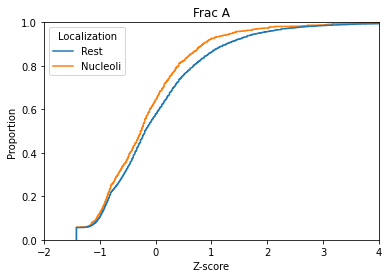

Ks_2sampResult(statistic=0.051246211831705524, pvalue=0.019962863302544587)
Frac C
-1.6997771670911739


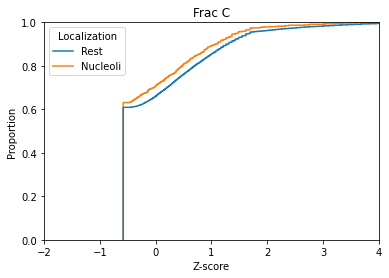

Ks_2sampResult(statistic=0.052963206219771464, pvalue=0.014584910344084179)
Frac D
1.8360962362158302


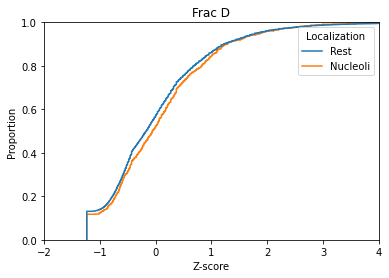

Ks_2sampResult(statistic=0.05352873048895912, pvalue=0.013122634869517761)
Frac E
1.8819789550211405


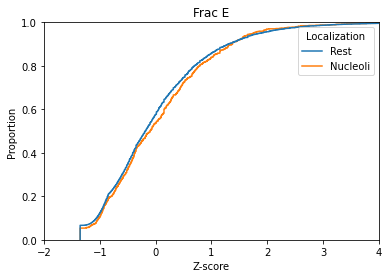

Ks_2sampResult(statistic=0.07118711763904945, pvalue=0.0002755286217420632)
Frac F
3.5598332802278256


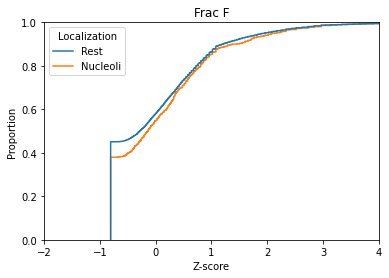

Ks_2sampResult(statistic=0.07129987825667805, pvalue=0.0002678710583266183)
Frac G
-3.572074206466564


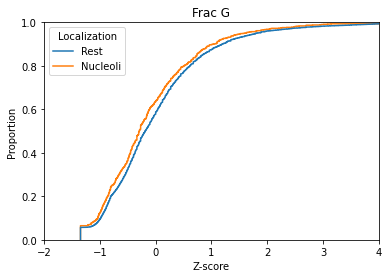

Ks_2sampResult(statistic=0.0294937397156525, pvalue=0.4303378464831309)
Frac H
0.0
Ks_2sampResult(statistic=0.08424232238121027, pvalue=7.83800570793877e-06)
Frac I
5.10579442458777


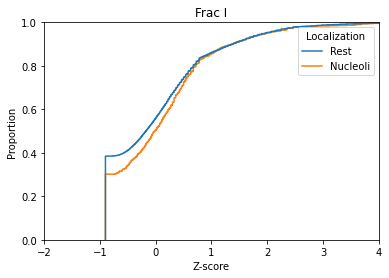

Ks_2sampResult(statistic=0.05541481928506131, pvalue=0.00915111348652283)
Frac K
2.038526058760784


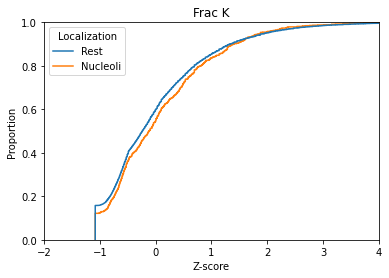

Ks_2sampResult(statistic=0.04140594068893855, pvalue=0.09880659153559898)
Frac L
0.0
Ks_2sampResult(statistic=0.052221144597489444, pvalue=0.016725157773038075)
Frac M
1.776629776720878


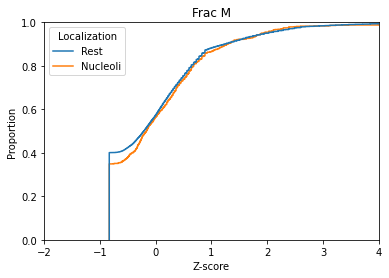

Ks_2sampResult(statistic=0.03760724760496495, pvalue=0.16720808353133773)
Frac N
0.0
Ks_2sampResult(statistic=0.06121557155282209, pvalue=0.002792765895939148)
Frac P
-2.553965467579681


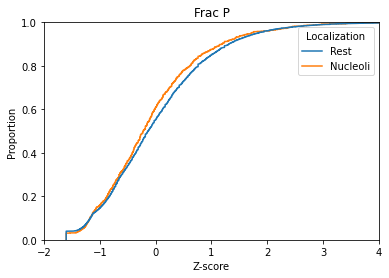

Ks_2sampResult(statistic=0.06024766306643664, pvalue=0.0034324494820761114)
Frac Q
-2.464395845880583


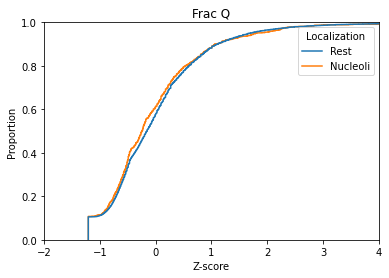

Ks_2sampResult(statistic=0.034987935683837096, pvalue=0.23317868871297812)
Frac R
0.0
Ks_2sampResult(statistic=0.05801798931909477, pvalue=0.005451360425391767)
Frac S
2.2634951029504675


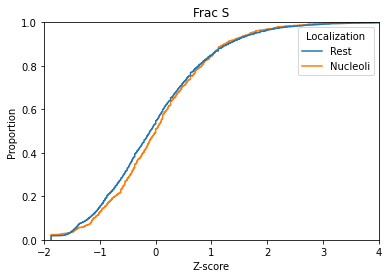

Ks_2sampResult(statistic=0.044826625200779235, pvalue=0.058897205238858365)
Frac T
0.0
Ks_2sampResult(statistic=0.03481949253349337, pvalue=0.23801436216848876)
Frac V
0.0
Ks_2sampResult(statistic=0.027501868062913548, pvalue=0.5207270172413472)
Frac W
0.0
Ks_2sampResult(statistic=0.06693924282082597, pvalue=0.0007712403351506029)
Frac Y
3.1128102653146974


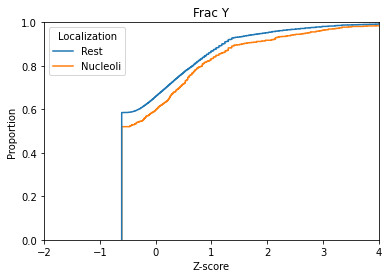

Ks_2sampResult(statistic=0.04607350457161974, pvalue=0.048277863124339064)
Frac K+R
1.3162519608995862


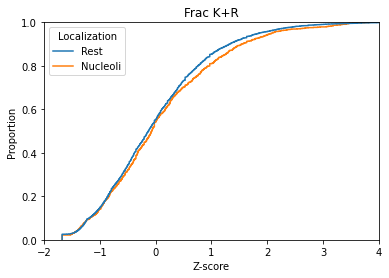

Ks_2sampResult(statistic=0.05849796623852205, pvalue=0.004941937754772465)
Frac D+E
2.3061027289722005


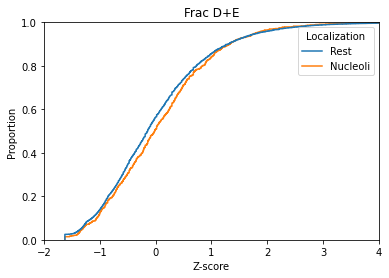

Ks_2sampResult(statistic=0.041872380752041694, pvalue=0.09229989630226869)
Frac Polar
0.0
Ks_2sampResult(statistic=0.054614470099294044, pvalue=0.01067986377366455)
Frac Aliphatic
-1.9714342868882766


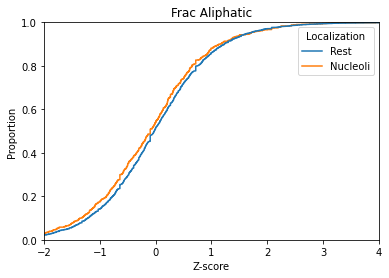

Ks_2sampResult(statistic=0.060008698011668415, pvalue=0.0036099243476669686)
Frac Aromatic
2.4425018994059897


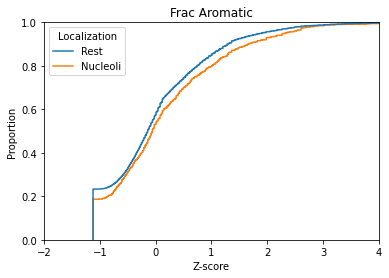

Ks_2sampResult(statistic=0.03386493482980568, pvalue=0.2668395306542934)
K/R Ratio
0.0
Ks_2sampResult(statistic=0.03489648049643701, pvalue=0.2357949520377903)
E/D Ratio
0.0
Ks_2sampResult(statistic=0.04465348369136765, pvalue=0.06051976101335842)
Frac Chain Expanding
0.0
Ks_2sampResult(statistic=0.06310747514975085, pvalue=0.0018485742837143825)
FCR
2.7331630929085375


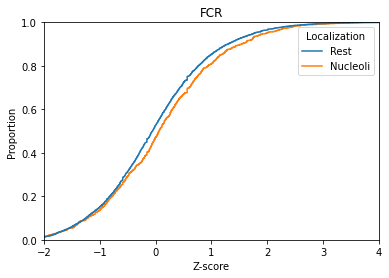

Ks_2sampResult(statistic=0.04081427307523461, pvalue=0.10760523790425182)
NCPR
0.0
Ks_2sampResult(statistic=0.058872532448565607, pvalue=0.0045751265115651215)
Hydrophobicity
-2.339596892304642


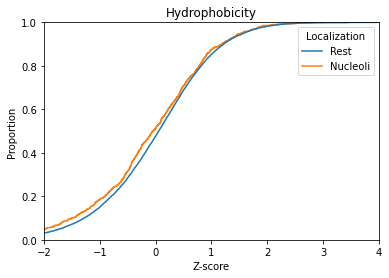

Ks_2sampResult(statistic=0.05992203422014941, pvalue=0.003676348938091453)
Disorder Promoting
-2.434583274572197


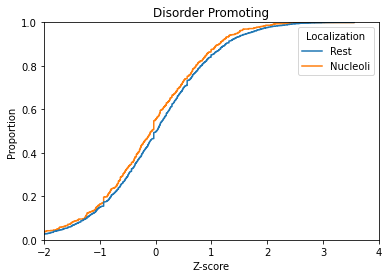

Ks_2sampResult(statistic=0.039764817822057485, pvalue=0.12480226546110863)
Iso point
0.0
Ks_2sampResult(statistic=0.04404697670595448, pvalue=0.06650893554870345)
PPII
0.0
Ks_2sampResult(statistic=0.02998967244854789, pvalue=0.4092433680887334)
A Block
0.0
Ks_2sampResult(statistic=8.475653684791862e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.02477230751811421, pvalue=0.6546984614063056)
D Block
0.0
Ks_2sampResult(statistic=0.048698770848793926, pvalue=0.031203050214055162)
E Block
1.5058029500077132


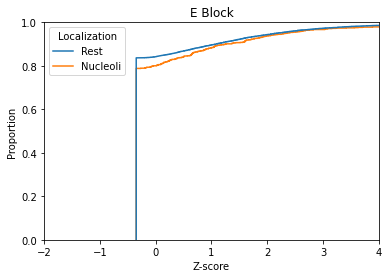

Ks_2sampResult(statistic=0.00021189134211974103, pvalue=1.0)
F Block
0.0
Ks_2sampResult(statistic=0.0184216146473809, pvalue=0.9271829244220661)
G Block
0.0
Ks_2sampResult(statistic=0.0029591753998384762, pvalue=1.0)
H Block
0.0
Ks_2sampResult(statistic=0.0009705600355623956, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.0439538468559163, pvalue=0.06747194224328959)
K Block
0.0
Ks_2sampResult(statistic=0.007549425690729694, pvalue=0.999999999785213)
L Block
0.0
Ks_2sampResult(statistic=0.001097694840834218, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.006184063938247331, pvalue=0.9999999999999986)
N Block
0.0
Ks_2sampResult(statistic=0.03612889264282093, pvalue=0.20235332361481317)
P Block
0.0
Ks_2sampResult(statistic=0.007149274357049373, pvalue=0.9999999999867464)
Q Block
0.0
Ks_2sampResult(statistic=0.056125667056506456, pvalue=0.007962812175075721)
R Block
2.098933528188126


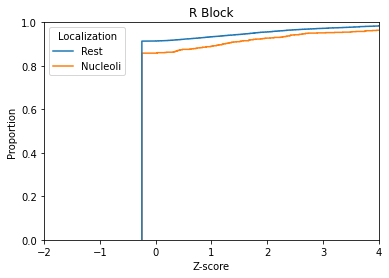

Ks_2sampResult(statistic=0.04996332721414709, pvalue=0.02506939767026458)
S Block
1.600856100490243


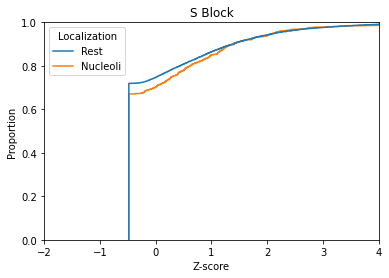

Ks_2sampResult(statistic=0.010774546821171738, pvalue=0.9999570043021802)
T Block
0.0
Ks_2sampResult(statistic=0.003670348800129841, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.0006356740263593341, pvalue=1.0)
Y Block
0.0
Ks_2sampResult(statistic=0.015929856197184455, pvalue=0.9791936958004372)
RG Frac
0.0
[6.24529307e-03 5.37099780e-01 1.63720238e-02 2.86750519e-03
 1.00000000e+00 2.17921592e-02 2.25189675e-01 4.56548161e-01
 1.34055124e-01 3.03385627e-02 4.52431481e-01 1.00000000e+00
 8.78367514e-01 9.65525035e-01 9.99999983e-01 1.39286787e-03
 2.18333541e-01 1.00000000e+00 5.52991831e-01 4.44159500e-01
 9.99993670e-01 1.16841388e-01 1.00000000e+00 6.47959012e-01
 9.98662948e-01 9.99914341e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.11733717e-01 3.00696894e-01
 7.53136780e-01 5.78505438e-01 8.78985497e-01 5.46279727e-01
 2.75267013e-05 1.99628633e-02 1.45849103e-02 1.31226349e-02
 2.75528622e-04 2.67871058e-04 4.30337846e-01 7.83800571e-06
 9.15111349e-0

In [7]:
from scipy.stats import ks_2samp
import seaborn as sbn
import math
dfk = pd.DataFrame()

#Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
#This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.
#two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','K/R Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Block','C Block','D Block','E Block','F Block','G Block','H Block','I Block','K Block','L Block','M Block','N Block','P Block','Q Block','R Block','S Block','T Block','V Block','Y Block','RG Frac']

pvallks=np.zeros((len(myfeat)))
pvallkslog=np.zeros((len(myfeat)))

for p in range(0,len(myfeat)): 
    
    nnzvec=[]
    nzvec=[]
    for idx in range(0,len(fullaccs)):
        if idx in allidx_nuc:
            nzvec.append(zvecaa[idx,p])
        else:
            nnzvec.append(zvecaa[idx,p])

    if p==0:
        print(len(allidx_nuc))
        print(len(nzvec))
        print(len(fullaccs))

    tmp=ks_2samp(nnzvec, nzvec, alternative='two-sided', mode='auto')
    print(tmp)
    pvallks[p]=tmp.pvalue
    
    if tmp.pvalue<0.05 and np.mean(nzvec)>np.mean(nnzvec):
        pvallkslog[p]=-1*math.log10(tmp.pvalue)
        print(myfeat[p])
        print(pvallkslog[p])
    elif tmp.pvalue<0.05 and np.mean(nzvec)<np.mean(nnzvec):
        pvallkslog[p]=math.log10(tmp.pvalue)
        print(myfeat[p])
        print(pvallkslog[p])
    else:
        print(myfeat[p])
        print(pvallkslog[p])
        pvallkslog[p]=0

    result=[]
    if tmp.pvalue<0.05:
        for s in range(0,len(zvecaa)):
            if s in allidx_nuc:
                result.append('Nucleoli')
            else:
                result.append('Rest')
        dfk['Z-score']=zvecaa[:,p]
        dfk['Localization']=result  

        #sbn.violinplot(x="Localization", y="Z-score", data=dfk, hue='Localization')
        #sbn.boxplot(x="Localization", y="Z-score", data=dfk, hue='Localization')
        sbn.ecdfplot(x="Z-score", data=dfk, hue='Localization', stat="proportion")
        plt.xlim([-2, 4])
        #hi

        plt.title(myfeat[p])
        plt.show() 
            
            
#np.savetxt("By_Condensate_Data/Nuclear_speckles_proteins_log_pvals.csv", pvallkslog,header="Nuclear speckles",comments='')
#np.savetxt("By_Condensate_Data/Nuclear_bodies_proteins_log_pvals.csv", pvallkslog,header="Nuclear bodies",comments='')
#np.savetxt("By_Condensate_Data/P-body_proteins_log_pvals.csv", pvallkslog,header="P-body",comments='')
#np.savetxt("By_Condensate_Data/Stress_granules_proteins_log_pvals.csv", pvallkslog,header="Stress granules",comments='')

print(pvallks)
print(pvallkslog)

## Plot p-values of features that are distinct between nucleolarome and rest of proteome

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


['Frac A', 'Frac G', 'Frac P', 'Frac Q', 'Disorder Promoting', 'Hydrophobicity', 'Frac Aliphatic', 'Frac C', 'pol-ala', 'Frac K+R', 'E Block', 'hyd-pos', 'S Block', 'Frac M', 'pol-pos', 'Frac D', 'Frac E', 'Frac K', 'R Block', 'pol-pol', 'Frac S', 'Frac D+E', 'Frac Aromatic', 'pol-neg', 'FCR', 'pos-pos', 'Frac Y', 'Frac F', 'Frac I']
[-4.560245829825247, -3.572074206466564, -2.553965467579681, -2.464395845880583, -2.434583274572197, -2.339596892304642, -1.9714342868882766, -1.6997771670911739, -1.661699737773913, 1.3162519608995862, 1.5058029500077132, 1.5180049980560038, 1.600856100490243, 1.776629776720878, 1.7858976327857476, 1.8360962362158302, 1.8819789550211405, 2.038526058760784, 2.098933528188126, 2.204447176567698, 2.2634951029504675, 2.3061027289722005, 2.4425018994059897, 2.542495786751603, 2.7331630929085375, 2.856090078246149, 3.1128102653146974, 3.5598332802278256, 5.10579442458777]


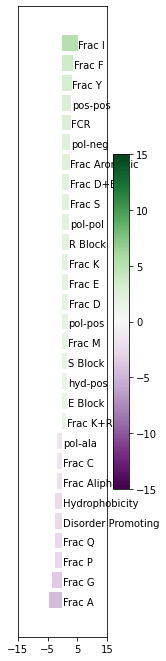

In [8]:
sigfeat=[]
sigspval=[]
for v in range(0,len(pvallkslog)):
    if pvallkslog[v]!=0:
        sigfeat.append(myfeat[v])
        sigspval.append(pvallkslog[v])
        
sort_index = np.argsort(sigspval)

ssigfeat=[]
ssigspval=[]
for s in sort_index:
    ssigfeat.append(sigfeat[s])
    ssigspval.append(sigspval[s])

print(ssigfeat)
print(ssigspval)
    
absssigspval = list(map(abs, ssigspval))

from matplotlib import cm
fig = plt.figure(figsize = (2, 0.4*len(ssigspval))) 

# If want to just use max and min of values
#colors = cm.RdBu_r((ssigspval-(-1*max(absssigspval)))/(max(absssigspval)-(-1*max(absssigspval))))
#tmp=[-1*max(absssigspval),max(absssigspval)]

# If want to set own range
minval=np.float64(-15)
maxval=np.float64(15)
colors = cm.PRGn((ssigspval-minval)/(maxval-minval))
tmp=[minval,maxval]

plot = plt.scatter(tmp, tmp, c = tmp, cmap = 'PRGn')
plt.clf()
plt.colorbar(plot)
X = np.arange(len(ssigspval))
plt.barh(X,ssigspval,color = colors)
for i, v in enumerate(ssigspval):
    if ssigspval[i]>0:
        plt.text(v + 0.25, i - 0.25, str(ssigfeat[i]), color='black')
    else:
        plt.text(0 + 0.25, i - 0.25, str(ssigfeat[i]), color='black')

plt.xticks([-15,-5,5,15])
plt.yticks([])
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

#plt.savefig('2022_06/Nucleolarome_vs_Proteome_Sig_Features.pdf', dpi=300, transparent=True, bbox_inches='tight')
#plt.yticks(X,ssigfeat)

## Plot condensate features vs full IDRome - Plot of Figure 1A

       Sequence Features    P-body  Stress granules  Nuclear speckles  \
0                pol-pol  0.000000         0.000000          2.204447   
1                pol-hyd  0.000000         0.000000          0.000000   
2                pol-pos  0.000000         0.000000          1.785898   
3                pol-neg  0.000000        -1.453479          2.542496   
7                pol-gly  0.000000         1.424476          0.000000   
9                hyd-pos  0.000000         0.000000          1.518005   
10               hyd-neg  0.000000         0.000000          0.000000   
15               pos-pos  0.000000         0.000000          2.856090   
16               pos-neg  0.000000         0.000000          0.000000   
21               neg-neg  0.000000         0.000000          0.000000   
35               gly-gly  0.000000         2.083116          0.000000   
37                Frac C -4.666455        -5.802241         -1.699777   
38                Frac D  0.000000         0.000000

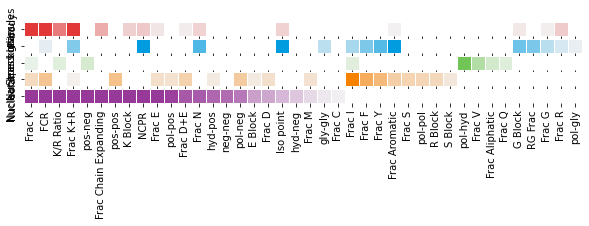

In [12]:
import seaborn as sbn
import math

dfpbody = pd.read_csv('../Bioinformatics_Data/By_Condensate_Data/P-body_proteins_log_pvals.csv')
#print(dfpbody)
dfsg = pd.read_csv('../Bioinformatics_Data/By_Condensate_Data/Stress_granules_proteins_log_pvals.csv')
dfns = pd.read_csv('../Bioinformatics_Data/By_Condensate_Data/Nuclear_speckles_proteins_log_pvals.csv')
dfnb = pd.read_csv('../Bioinformatics_Data/By_Condensate_Data/Nuclear_bodies_proteins_log_pvals.csv')
dfn = pd.read_csv('../Bioinformatics_Data/By_Condensate_Data/Nucleolarome_proteins_log_pvals.csv')
dffeature = pd.DataFrame(myfeat,columns =['Sequence Features'])
#print(dffeature)

cutoffval=-math.log10(0.05) # if equal to 2 only showing features with p-value<0.01

dfr = pd.concat([dffeature, dfpbody, dfsg, dfns, dfnb, dfn], axis=1)
dfr = dfr[ (dfr['P-body'] >cutoffval) | (dfr['Stress granules'] >cutoffval) | (dfr['Nuclear speckles'] >cutoffval) | (dfr['Nuclear bodies'] >cutoffval) | (dfr['Nucleolar'] >cutoffval)]
print(dfr)

# Set all negative values to zero
dfr['Nucleolar'][dfr['Nucleolar']<cutoffval] = 0
dfr['Nuclear bodies'][dfr['Nuclear bodies']<cutoffval] = 0
dfr['Nuclear speckles'][dfr['Nuclear speckles']<cutoffval] = 0
dfr['Stress granules'][dfr['Stress granules']<cutoffval] = 0
dfr['P-body'][dfr['P-body']<cutoffval] = 0

final_dfr = dfr.sort_values(by=['Nucleolar','Nuclear speckles','Nuclear bodies','Stress granules','P-body'], ascending=False)
#final_dfr = dfr.sort_values(by=['Nucleolar'], ascending=False)
#final_dfr = dfr
print(final_dfr)

final_dfr2=final_dfr;
mygroup=final_dfr2.pop('Sequence Features')

## Muted
#myredcmap = sbn.light_palette("#bb342f", reverse=False, as_cmap=True)
#myredcmap.set_under('white')
#myorangecmap = sbn.light_palette("#dd8448", reverse=False, as_cmap=True)
#myorangecmap.set_under('white')
#mygreencmap = sbn.light_palette("#8cbcb0", reverse=False, as_cmap=True)
#mygreencmap.set_under('white')
#mypurplecmap = sbn.light_palette("#f29aa8", reverse=False, as_cmap=True)
#mypurplecmap.set_under('white')
#mybluecmap = sbn.light_palette("#66609f", reverse=False, as_cmap=True)
#mybluecmap.set_under('white')

# Apple rainbow
myredcmap = sbn.light_palette("#e23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')
myorangecmap = sbn.light_palette("#f78200", reverse=False, as_cmap=True)
myorangecmap.set_under('white')
mygreencmap = sbn.light_palette("#5ebd3e", reverse=False, as_cmap=True)
mygreencmap.set_under('white')
mypurplecmap = sbn.light_palette("#973999", reverse=False, as_cmap=True)
mypurplecmap.set_under('white')
mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharey=False,figsize = (10, 1.5))
g1 = sbn.heatmap(final_dfr2[['P-body']].T,cmap=myredcmap,cbar=False,ax=ax1,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g2 = sbn.heatmap(final_dfr2[['Stress granules']].T,cmap=mybluecmap,cbar=False,ax=ax2,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g3 = sbn.heatmap(final_dfr2[['Nuclear bodies']].T,cmap=mygreencmap,cbar=False,ax=ax3,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g4 = sbn.heatmap(final_dfr2[['Nuclear speckles']].T,cmap=myorangecmap,cbar=False,ax=ax4,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g5 = sbn.heatmap(final_dfr2[['Nucleolar']].T,cmap=mypurplecmap,cbar=False,ax=ax5,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/compare_condensate_sequence_features_IDRs_gte_30_by_cluster_rainbow.pdf", transparent=True, bbox_inches = "tight") 

#plt.savefig('Compare_condensate_features_202210.pdf', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig('../2023_02/Compare_condensate_features_202303.pdf', dpi=300, transparent=True, bbox_inches='tight')


#sbn.heatmap(final_dfr2[['Nucleolar']], cmap='Blues',vmin=0,vmax=15)
#plt.pcolor(final_dfr2,vmin=0, vmax=15,cmap='Blues',edgecolors='grey', linewidths=2) 

## Create colorbar

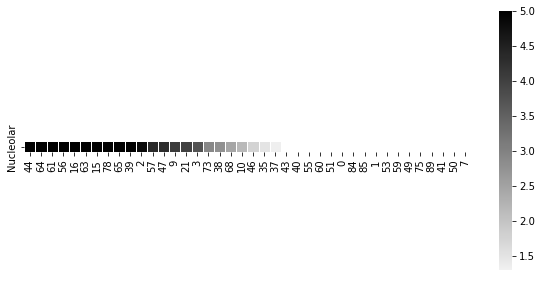

In [13]:
myblackcmap = sbn.light_palette("black", reverse=False, as_cmap=True)
myblackcmap.set_under('white')

f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (10, 5))
g5 = sbn.heatmap(final_dfr2[['Nucleolar']].T,cmap=myblackcmap,cbar=True,ax=ax1,vmin=cutoffval, vmax=5, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/compare_condensate_sequence_features_IDRs_gte_30_by_cluster_colorbar.pdf", transparent=True, bbox_inches = "tight") 


## Get |net charge| by condensate

### Get |net charge| for all human IDRome 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

aas='ACDEFGHIKLMNPQRSTVY' # For blocks - no W Block in proteome so this is removed

filename=[speciesname]

for fname in filename:
    myfile = open('../Bioinformatics_Data/min_length_30/All/'+fname, 'r')
    Lines = myfile.readlines()

    absnetcharge=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()

            absnetcharge.append(abs(SeqOb.get_NCPR())*slen)


#print(absnetcharge)
#print(np.mean(absnetcharge))
#print(np.std(absnetcharge))

print(max(absnetcharge))
print(len(absnetcharge))

testz=3

anclim=testz*np.std(absnetcharge)+np.mean(absnetcharge)
print(anclim)

print((anclim-np.mean(absnetcharge))/np.std(absnetcharge))

365.0
24508
31.56334230871881
3.0


### Get z-score |net charge| for each human IDR

In [15]:
zvecabsnc=[]
for currseq in myseqs:
    #countseq=countseq+1
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    absnc=abs(SeqOb.get_NCPR())*slen
    
    zvecabsnc.append((absnc-np.mean(absnetcharge))/np.std(absnetcharge))
    
idx=fullaccswnums.index('P19338_1')
print(myseqs[idx])
print(zvecabsnc[idx])

MVKLAKAGKNQGDPKKMAPPPKEVEEDSEDEEMSEDEEDDSSGEEVVIPQKKGKKAAATSAKKVVVSPTKKVAVATPAKKAAVTPGKKAAATPAKKTVTPAKAVTTPGKKGATPGKALVATPGKKGAAIPAKGAKNGKNAKKEDSDEEEDDDSEEDEEDDEDEDEDEDEIEPAAMKAAAAAPASEDEDDEDDEDDEDDDDDEEDDSEEEAMETTPAKGKKAAKVVPVKAKNVAEDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEEPVKEAPGKRKKEMAKQKAAPEAKKQKVEGTEPT
6.6998547571976


### Get |net charge| for each condensate

In [18]:
import math 
mylocs=['subcell_location_Nucleoli_Nucleoli_fibrillar_center_Nucleoli_rim','subcell_location_Nuclear_speckles','cajal_body']
mylocsname=['Nucleolus','Nuclear speckles','Cajal body']
mylocscolor=['#973999', '#f78200', '#5ebd3e']

chargevallim=anclim # z-score =3 for |net charge| for full human IDRome

condtype=[]
ncprlist=[]
meanncpr=[]
stencpr=[]
medianncpr=[]
ncprallidrseq=[]
frackallidrseq=[]
fracrallidrseq=[]
fracdallidrseq=[]
fraceallidrseq=[]
condcompare=[]
numhighnegall=[]
numhighposall=[]
ncprlistlog=[]
highchargeval=[]
highchargegene=[]
highchargeloc=[]
highchargelocnum=[]
for a in range(0,len(mylocs)):
    numhighneg=0
    numhighpos=0
    
    print(mylocsname[a])
    # Get accessions
    tmpdf=pd.read_table('../Bioinformatics_Data/HPA_All/2023_03/'+mylocs[a]+'.tsv')
    accs_cond=tmpdf['Uniprot'].tolist()
    accs_cond=[x for x in accs_cond if str(x) != 'nan']
    
    tmpncpr=[]
    allidrseq=''
    for f in range(0,len(fullaccs)):
        if fullaccs[f] in accs_cond:
            currseq=myseqs[f]
            #print(currseq)
            SeqOb = SequenceParameters(currseq)
            tmpfcr=SeqOb.get_FCR()
            tmpfcrz=(tmpfcr-meanvals_sapiens[28])/stdvals_sapiens[28]
            if tmpfcr>=0.0:
                allidrseq=allidrseq+currseq
                condtype.append(mylocsname[a])
                SeqOb = SequenceParameters(currseq)
                tmpaafrac=SeqOb.get_amino_acid_fractions()
                tmpchargeval=tmpaafrac['K']*len(currseq)+tmpaafrac['R']*len(currseq)-tmpaafrac['D']*len(currseq)-tmpaafrac['E']*len(currseq)

                #tmpncpr.append(SeqOb.get_NCPR())
                tmpncpr.append(tmpchargeval)
                #ncprlist.append(SeqOb.get_NCPR())
                ncprlist.append(tmpchargeval)

                if tmpchargeval>0.9:
                    ncprlistlog.append(math.log10(tmpchargeval))
                elif tmpchargeval<-0.9:
                    ncprlistlog.append(-math.log10(-tmpchargeval))
                else:
                    ncprlistlog.append(0)
                    
                if tmpchargeval>=chargevallim or tmpchargeval<=-chargevallim:
                    print(mygenes[f])
                    print(currseq)
                    print((tmpaafrac['K']+tmpaafrac['R']-tmpaafrac['D']-tmpaafrac['E'])*len(currseq))
                    if tmpchargeval<=-chargevallim:
                        numhighneg=numhighneg+1
                    if tmpchargeval>=chargevallim:
                        numhighpos=numhighpos+1
                    highchargeval.append(tmpchargeval)
                    highchargegene.append(mygenes[f])
                    highchargeloc.append(mylocsname[a])
                    highchargelocnum.append(a)
                if a == 0:
                    condcompare.append('Nucleolus')
                else:
                    condcompare.append('Condensate')
            
    meanncpr.append(np.mean(tmpncpr))
    stencpr.append(np.std(tmpncpr)/np.sqrt(len(tmpncpr)))
    medianncpr.append(np.median(tmpncpr))
    SeqOb = SequenceParameters(allidrseq)
    ncprallidrseq.append(SeqOb.get_NCPR())
    tmpaafrac=SeqOb.get_amino_acid_fractions()
    frackallidrseq.append(tmpaafrac['K'])
    fracrallidrseq.append(tmpaafrac['R'])
    fracdallidrseq.append(-tmpaafrac['D'])
    fraceallidrseq.append(-tmpaafrac['E'])
    numhighnegall.append(numhighneg)
    numhighposall.append(numhighpos)
    print(numhighnegall)
    print(numhighposall)
    print(max(ncprlistlog))
    print(len(allidrseq))
        
dfNCPR=pd.DataFrame()
dfNCPR['Condensate']=condtype
dfNCPR['NCPR']=ncprlistlog
dfNCPR['Compare']=condcompare

print(meanncpr)
print(dfNCPR)


Nucleolus
MYBBP1A IDR2
LGVQRPKLEKKDAKEIPSATQSPISKKRKKKGFLPETKKRKKRKSEDGTPAEDGTPAATGGSQPPSMGRKKRNRTKAKVPAQANGTPTTKSPAPGAPTRSPSTPAKSPKLQKKNQKPSQVNGAPGSPTEPAGQKQHQKALPKKGVLGKSPLSALARKKARL
31.999999999999996
MKI67 IDR19
LFSAPGHTEESMTIDKNTKIPCKSPPPELTDTATSTKRCPKTRPRKEVKEELSAVERLTQTSGQSTHTHKEPASGDEGIKVLKQRAKKKPNPVEEEPSRRRPRAPKEKAQPLEDLAGFTELSETSGHTQESLTAGKATKIPCESPPLEVVDTTASTKRHLRTRVQKVQVKEEPSAVKFTQTSGETTDADKEPAGEDKGIKALKESAKQTPAPAASVTGSRRRPRAPRESAQAIEDLAGFKDPAAGHTEESMTDDKTTKIPCKSSPELEDTATSSKRRPRTRAQKVEVKEELLAVGKLTQTSGETTHTDKEPVGEGKGTKAFKQPAKRKLDAEDVIGSRRQPRAPKEKAQPLEDLASFQELSQTPGHTEELANGAADSFTSAPKQTPDSGKPLKISRRVLRAPKVEPVGDVVSTRDPVKSQSKSNTSLPPLPFKRGGGKDGSVTGTKRLRCMPAPEEIVEELPASKKQRVAPRARGKSSEPVVIMKRSLRTSAKRIEPAEELNSNDMKTNKEEHKLQDSVPENKGISLRSRRQNKTEAEQQITEVFVLAERIEINRNEKKPMKTSPEMDIQNPDDGARKPIPRDKVTENKRCLRSARQNESSQPKVAEESGGQKSAKVLMQNQKGKGEAGNSDSMCLRSRKTKSQPAASTLESKSVQRVTRSVKRCAENPKKAEDNVCVKKIRTRSHRDSEDI
33.0
ERICH1 IDR1
MAAHRKHVFVEKVLQRLFPPVPSGQGKREPQTLAVQNPPKKVTSEKVSQKHAEPLTDTGSETPTARRLYTASGP

UTP3 IDR1
MVGRSRRRGAAKWAAVRAKAGPTLTDENGDDLGLPPSPGDTSYYQDQVDDFHEARSRAALAKGWNEVQSGDEEDGEEEEEEVLALDMDDEDDEDGGNAGEEEEEENADDDGGSSVQSEAEASVDPSLSWGQRKKLYYDTDYGSKSRGRQSQQEAEEEEREEEEEAQI
-35.0
ZNF142 IDR3
QLRYASQEPEGAMQGPTPPPDSEPSNQLSARPEGPGHEPGTVVDPSLDQALPEMSEEVNTGRQEGSEAPHGGDLGGSPSPAEVEEGSCTLHLEALGVELESVTEPPLEEVTETAPMEFRPLGLEGPDGLEGPELSSFEGIGTSDLSAEENPLLEKPVSEPSTNPPSLEEAPNNWVGTFKTTPPAETAPLPPLPESESLL
-34.0
AATF IDR2
KTTSRKAWNEDHWEQTLPGSSDEEISDEEGSGDEDSEGLGLEEYDEDDLGAAEEQECGDHRESKKSRSHSAKTPGFSVQSISDFEKFTKGMDDLGSSEEEEDEESGMEEGDDAEDSQGESEEDRAGDRNSEDDGVV
-37.00000000000001
HOMEZ IDR6
PAEVVVCLDEEEEEEEEELPEDDEEEEEEEEEDDDDDDDDVIIQD
-31.999999999999996
DDX54 IDR3
GDEAQNLTRGRQQLKWDRKKKRFVGQSGQEDKKKIKTESGRYISSSYKRDLYQKWKQKQKIDDRDSDEEGASDRRGPERRGGKRDRGQGASRPHAPGTPAGRVRPELKTKQQILKQRRRAQKLHFLQRGGLKQLSARNRRRVQELQQGAFGRGARSKKGKMRKRM
33.0
ZNF428 IDR1
MTETREPAETGGYASLEEDDEDLSPGPEHSSDSEYTLSEPDSEEEEDEEEEEEETTDDPEYDPGYKVKQRLGGGRGGPSRRAPRAAQPPAQPCQLCGRSPLGEAPPGTPPCRLCCPATAPQEAPAPEGRALGEEEEEPPRAGEGRPAGREEEEEEEEEGTY

MEPEDLPWPGELEEEEEEEEEEEEEEEEAAAAAAANVDDVVVVEEVEEEAGRELDSDSHYGPQHLESIDDEEDEEAK
-36.0
RSRC2 IDR1
MAASDTERDGLAPEKTSPDRDKKKEQSEVSVSPRASKHHYSRSRSRSRERKRKSDNEGRKHRSRSRSKEGRRHESKDKSSKKHKSEEHNDKEHSSDKGRERLNSSENGEDRHKRKERKSSRGRSHSRSRSRERRHRSRSRERKKSRSRSRERKKSRSRSRERKKSRSRSRERKRRIRSRSRSRSRHRHRTRSRSRTRSRSRDRKKRIEKPRRFSRSLSRTPSPPPFRGRNTAMDAQEALARRLERAKKLQEQREKEMVEKQKQQ
65.99999999999999
RSRC1 IDR1
MGRRSSDTEEESRSKRKKKHRRRSSSSSSSDSRTYSRKKGGRKSRSKSRSWSRDLQPRSHSYDRRRRHRSSSSSSYGSRRKRSRSRSRGRGKSYRVQRSRSKSRTRRSRSRPRLRSHSRSSERSSHRRTRSRSRDRERRKGRDKEKREKEKDKGKDKELHNIKRGESGNIKAGLEHLPPAEQ
49.99999999999999
SON IDR9
PLLPKDMERLTSLRAGIEGPLLASDVGRDRSAASPVVSSMPERASESSSEEKDDYEIFVKVKDTHEKSKKNKNRDKGEKEKKRDSSLRSRSKRSKSSEHKSRKRTSESRSRARKRSSKSKSHRSQTRSRSRSRRRRRSSRSRSKSRGRRSVSKEKRKRSPKHRSKSRERKRKRSSSRDNRKTVRARSRTPSRRSRSHTPSRRRRSRSVGRRRSFSISPSRRSRTPSRRSRTPSRRSRTPSRRSRTPSRRSRTPSRRSRTPSRRRRSRSVVRRRSFSISPVRLRRSRTPLRRRFSRSPIRRKRSRSSERGRSPKRLTDLD
97.99999999999999
CIR1 IDR2
RNLTANDPSQEYVASEGEEDPEVEFLKSLTTKQKQKLLRKLDRLEKKKKKKDR

TRIP12 IDR1
MSNRPNNNPGGSLRRSQRNTAGAQPQDDSIGGRSCSSSSAVIVPQPEDPDRANTSERQKTGQVPKKDNSRGVKRSASPDYNRTNSPSSAKKPKALQHTESPSETNKPHSKSKKRHLDQEQQLKSAQSPSTSKAHTRKSGATGGSRSQKRKRTESSCVKSGSGSESTGAEERSAKPTKLASKSATSAKAGCSTITDSSSAASTSSSSSAVASASSTVPPGARVKQGKDQNKARRSRSASSPSPRRSSREKEQSKTGGSSKFDWAARFSPKVSLPKTKLSLPGSSKSETSKPGPSGLQAKLASLRKSTKKRSESPPAELPSLRRSTRQKTTGSCASTSRRGSGLGKRGAAEARRQEKMADPESNQEAVNSSAARTDEAPQGAAGAVGMTTSGESESDDSEMGRLQALL
38.99999999999999
SRRM1 IDR1
RQIEQEKLASMKKQDEDKDKRDKEEKESSREKRERSRSPRRRKSRSPSPRRRSSPVRRERKRSHSRSPRHRTKSRSPSPAPEKKEKTPELPEPSVKVKEPSVQEATSTSDILKVPKPEPIPEPKEPSPEKNSKKEKEKEKTRPRSRSRSKSRSRTRSRSPSHTRPRRRHRSRSRSYSPRRRPSPRRRPSPRRRTPPRRMPPPPRHRRSRSPVRRRRRSSASLSGSSSSSSSSRSRSPPKKPPKRTSSPPRKTRRLSPSASPPRRRHRPSPPATPPPKTRHSPTPQQSNRTRKSRVSVSPGRTSGKVTKHKGTEKRESPSPAPKPRKVELSESEEDKGGKMAAADSVQQRRQYRRQNQQSSSDSGSSSSSEDERPKRSHVKNGEVGRRRRHSPSRSASPSPRKRQKETSPRGRRRRSPSPPPTRRRRSPSPAPPPRRRRTPTPPPRRRTPSPPPRRRSPSPRRYSPPIQRRYSPSPPPKRRTASPPPPPKRRASPSPPPKRRVSHSPPPKQRSSPVTKRRSPSLSSKHRKGSSPSRSTREARSPQPNKRHSPS

### Plot |Net charge| by condensate

[-0.7610936799641417, 0.5378704720087816, 2.858267716535433]
[-0.009216489809211062, 0.005530349202049615, 0.029116868532926925]
[-30.511627906976745, 38.205128205128204, 121.0]


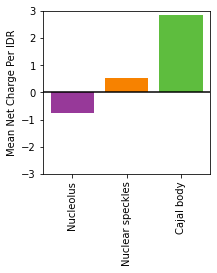

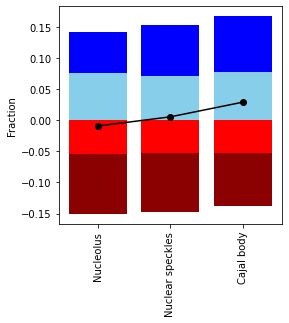

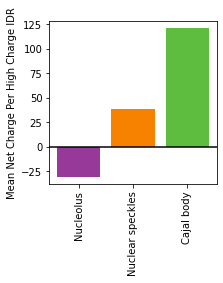

In [19]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (3,3))
ax1.set_ylabel("Mean Net Charge Per IDR")
ax1.bar(np.arange(0,len(mylocs),1),meanncpr, color=['#973999', '#f78200', '#5ebd3e'])
plt.xticks(np.arange(0, len(mylocsname), 1), mylocsname,rotation=90) 
plt.axhline(y = 0.0, color = 'black', linestyle = '-')
plt.ylim([-3,3])
print(meanncpr)

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/mean_net_charge_idrs_by_condensate.pdf", transparent=True, bbox_inches = "tight") 

plt.figure(figsize=(4,4))

plt.bar(mylocsname, frackallidrseq, color='skyblue')
plt.bar(mylocsname, fracrallidrseq, bottom=frackallidrseq, color='b')
plt.xticks(np.arange(0, len(mylocsname), 1), mylocsname,rotation=90) 
#plt.show()

plt.bar(mylocsname, fracdallidrseq, color='r')
plt.bar(mylocsname, fraceallidrseq, bottom=fracdallidrseq, color='darkred')
plt.xticks(np.arange(0, len(mylocsname), 1), mylocsname,rotation=90) 
plt.ylabel('Fraction')

print(ncprallidrseq)
plt.plot(mylocsname,ncprallidrseq,color='k',marker='o')
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("fraction_charge_residues_combined_idrs.pdf", transparent=True, bbox_inches = "tight") 

ncprhighfc=[]
ncprhighgc=[]
ncprhighnucleoplasm=[]
for i in range(0,len(highchargeval)):
    if highchargeloc[i]=='Nucleolus':
        ncprhighfc.append(highchargeval[i])
    if highchargeloc[i]=='Nuclear speckles':
        ncprhighgc.append(highchargeval[i])
    if highchargeloc[i]=='Cajal body':
        ncprhighnucleoplasm.append(highchargeval[i])

meanhighncpr=[]  
meanhighncpr.append(np.mean(ncprhighfc))
meanhighncpr.append(np.mean(ncprhighgc))
meanhighncpr.append(np.mean(ncprhighnucleoplasm))

print(meanhighncpr)

f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (3,3))
ax1.set_ylabel("Mean Net Charge Per High Charge IDR")
ax1.bar(np.arange(0,len(mylocs),1),meanhighncpr, color=['#973999', '#f78200', '#5ebd3e'])
plt.xticks(np.arange(0, len(mylocs), 1), mylocsname,rotation=90) 
plt.axhline(y = 0.0, color = 'black', linestyle = '-')

### Plot highest net charge proteins

          Gene  Charge          Location  LocNum
62  SRRM2 IDR2   365.0  Nuclear speckles       1
83  SRRM2 IDR2   365.0        Cajal body       2
76  SRRM1 IDR1   165.0  Nuclear speckles       1
57    SON IDR9    98.0  Nuclear speckles       1
44  SRSF4 IDR1    91.0  Nuclear speckles       1
..         ...     ...               ...     ...
35  KAT6A IDR2   -91.0         Nucleolus       0
72  KAT6A IDR2   -91.0  Nuclear speckles       1
25   LEO1 IDR1   -93.0         Nucleolus       0
40  PELP1 IDR2  -126.0         Nucleolus       0
12   MDN1 IDR2  -150.0         Nucleolus       0

[85 rows x 4 columns]


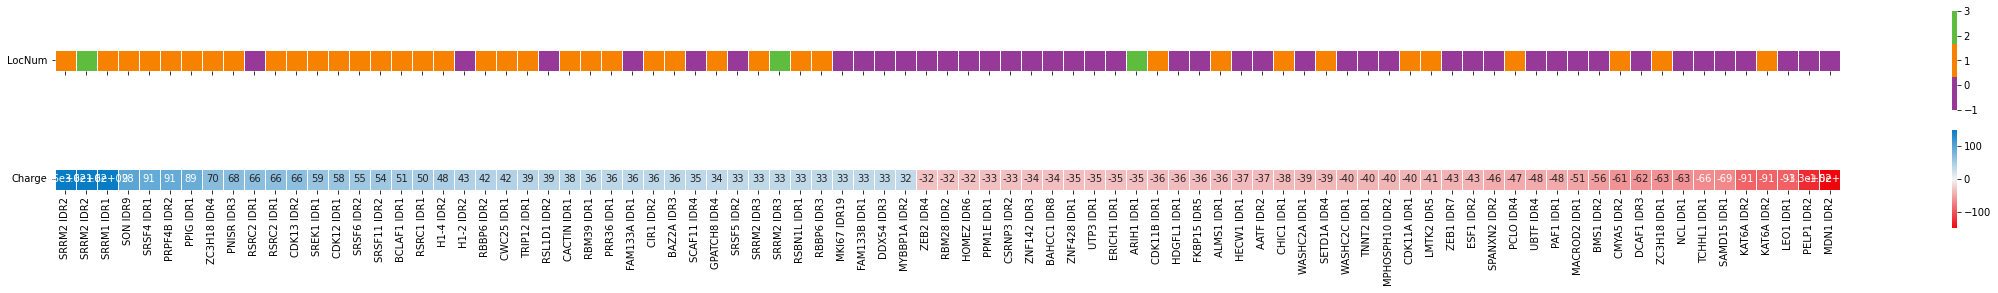

In [20]:
import seaborn as sbn 
import matplotlib

dfhc=pd.DataFrame()
dfhc['Gene']=highchargegene
dfhc['Charge']=highchargeval
dfhc['Location']=highchargeloc
dfhc['LocNum']=highchargelocnum


final_dfhc = dfhc.sort_values(by=['Charge','Gene'], ascending=False)
print(final_dfhc)

mybwr=sbn.diverging_palette(12, 246, s=99, l=50, sep=5, n=6, center='light', as_cmap=True)
colorsList = ['#973999', '#f78200', '#5ebd3e']
loccmap = matplotlib.colors.ListedColormap(colorsList)

f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (40, 4))
g2 = sbn.heatmap(final_dfhc[['Charge']].T,cmap=mybwr,cbar=True,ax=ax2,vmin=-150,vmax=150,square=True, linewidth=.5,cbar_kws={"orientation": "vertical"},annot=True)
g1 = sbn.heatmap(final_dfhc[['LocNum']].T,cmap=loccmap,cbar=True,ax=ax1,vmin=-1,vmax=3,square=True, linewidth=.5,cbar_kws={"orientation": "vertical"},annot=False)
ax1.tick_params(labelrotation=0)
ax2.tick_params(labelrotation=0)
plt.xticks(np.arange(0.5, len(final_dfhc['Gene'].tolist()), 1), final_dfhc['Gene'].tolist(),rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/net_charge_idrs_zscore_gte_3_by_condensate.pdf", transparent=True, bbox_inches = "tight") 


## Plot Figure 7I

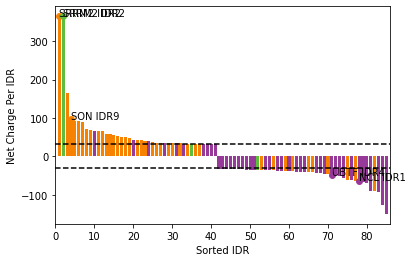

In [21]:
sortedhighchargeval=final_dfhc['Charge'].tolist()
sortedhighchargelocnum=final_dfhc['LocNum'].tolist()
sortedhighchargegene=final_dfhc['Gene'].tolist()
#x=np.arange(1, len(sortedhighchargeval)+1, 1)
#plt.scatter(x,sortedhighchargeval,s=50)
#plt.bar(x,sortedhighchargeval)

colorsList = ['#973999', '#f78200', '#5ebd3e']
labelList = ['SRRM2 IDR2','SON IDR9','NCL IDR1','UBTF IDR4']
for i in range(0,len(sortedhighchargeval)):
    #plt.scatter(i+1,sortedhighchargeval[i],s=50,color=colorsList[sortedhighchargelocnum[i]])
    plt.bar(i+1,sortedhighchargeval[i],color=colorsList[sortedhighchargelocnum[i]])
    if sortedhighchargegene[i] in labelList:
        plt.text(i+1,sortedhighchargeval[i],sortedhighchargegene[i])
        plt.scatter(i+1,sortedhighchargeval[i],s=35,color=colorsList[sortedhighchargelocnum[i]])
    
plt.xlim([0,len(sortedhighchargeval)+1])
plt.ylabel('Net Charge Per IDR')
plt.xlabel('Sorted IDR')

plt.axhline(y = anclim, color = 'k', linestyle = '--')
plt.axhline(y = -anclim, color = 'k', linestyle = '--')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/sorted_net_charge_idrs_zscore_gte_3_by_condensate_bar.pdf", transparent=True, bbox_inches = "tight") 


## Get enrichment of |net charge| by condensate

In [27]:
from scipy.stats import fisher_exact
mylocs=['subcell_location_Nucleoli_Nucleoli_fibrillar_center_Nucleoli_rim','subcell_location_Nuclear_speckles','cajal_body']


# Features:
# 1. |Net charge|

pvalsbylocation=np.zeros((len(mylocs),1))
pvalsbylocationlog=np.zeros((len(mylocs),1))
cutoffval=3
for a in range(0,len(mylocs)):    
    # Get accessions
    tmpdf=pd.read_table('../Bioinformatics_Data/HPA_All/2023_03/'+mylocs[a]+'.tsv')
    accs_cond=tmpdf['Uniprot'].tolist()
    
    
    # 1. Find D/E-tract IDRs
    subfeatureyes=0
    subfeatureno=0
    restfeatureyes=0
    restfeatureno=0
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in accs_cond:
            if round(zvecabsnc[idx],1)>=cutoffval:
                subfeatureyes=subfeatureyes+1
            else:
                subfeatureno=subfeatureno+1
        else:
            if round(zvecabsnc[idx],1)>=cutoffval:
                restfeatureyes=restfeatureyes+1
            else:
                restfeatureno=restfeatureno+1

    print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

    # defining the table
    if subfeatureyes+restfeatureyes>0:
        data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
        print(data)
        # One-sided greater used to test if greater occurrence in nucleolus
        res = fisher_exact(data, alternative='greater')
        print(res[1])
        pvalsbylocation[a,0]=res[1]
        pvalsbylocationlog[a,0]=-math.log10(res[1])
    
    



24508
[[43, 2188], [311, 21966]]
0.03172339676082474
24508
[[39, 872], [315, 23282]]
1.5972352161238407e-09
24508
[[3, 124], [351, 24030]]
0.278155618221562


(0.0, 12.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


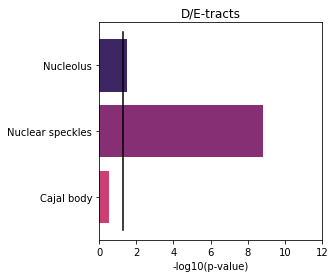

In [28]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (4,4))
ax1.title.set_text("D/E-tracts")
ax1.barh(np.arange(0,len(mylocs),1),pvalsbylocationlog[:,0], color=['#3d2663', '#872f74', '#cb3f73', '#ff6361','#276026','#008770', '#00aabe', '#64c8ff'])
f.gca().invert_yaxis()
ax1.plot([-math.log10(0.05),-math.log10(0.05)],[-0.5, len(mylocs)-0.5],color='black')
ax1.set_yticks(np.arange(0,len(mylocs),1)) 
ax1.set_yticklabels(['Nucleolus','Nuclear speckles','Cajal body'], rotation=0)
ax1.set_xlabel('-log10(p-value)')
ax1.set_xlim(0,12)

## Examine top IDRs with a given sequence grammar

In [29]:
dfzvec = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)
dftmp = pd.DataFrame()
dftmp['Genes']=genenameswnums_nuc
dftmp['Seqs']=seqs_nuc
df2 = pd.concat([dftmp, dfzvec], axis=1)

cutoffval=3
#featurecheck='RG Frac'
featurecheck='neg-neg'
#featurecheck='E Block'
df2 = df2[ (df2[featurecheck] >cutoffval)]
df2 = df2.sort_values(by=[featurecheck], ascending=False)
print(df2[['Genes',featurecheck,'Seqs']])
print(len(df2[featurecheck]))
#print(df2['Seqs'].tolist())

            Genes    neg-neg  \
5      CHIC1 IDR1  12.995148   
513    EHMT2 IDR2   8.606542   
1    PPP4R3B IDR1   7.593935   
726     BRD2 IDR2   7.399726   
523  PPP4R3A IDR1   7.035796   
669   SETD1A IDR4   7.003718   
63     KAT6A IDR2   6.489100   
324    ALMS1 IDR1   6.327413   
847    RBM27 IDR7   5.495372   
563     ISY1 IDR1   5.184644   
263   CD2BP2 IDR1   4.940697   
588    NCBP3 IDR3   4.896409   
788    DDX42 IDR1   4.842919   
660   HP1BP3 IDR3   4.576226   
85     DHX15 IDR1   4.380071   
72    ZC3H18 IDR4   4.337750   
750  ZC3H11A IDR1   4.300911   
867      WRN IDR1   4.199134   
318    VPS72 IDR1   4.099939   
216    CWC22 IDR2   4.087446   
243   ZC3H14 IDR2   4.084295   
671   SETD1A IDR6   4.050254   
271   PABPN1 IDR1   3.992755   
679    RBM25 IDR4   3.935199   
873    SREK1 IDR1   3.847067   
401    SF3B2 IDR3   3.838794   
162   CDK11B IDR1   3.799971   
457    HDAC5 IDR5   3.787906   
399    SF3B2 IDR1   3.710213   
81    SLC4A2 IDR1   3.681231   
191  TBC